In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Business problems that can be solved using this dataset:

1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?
2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?
3. Profit Margin Analysis: Does the profit margin significantly impact sales?
4. Efficiency of Sales Methods: Which sales method is more effective - in-store or online?
5. Price Optimization: Is there a specific price range that achieves better sales than others?
6. Product Portfolio Optimization I: Determine which products are most profitable, segmented by location.
7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.
8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.
9. Predictive Sales Analysis: Develop a forecast for monthly sales.

## 0. Exploring Data

In [2]:
df=pd.read_excel('Adidas US Sales Datasets.xlsx')

In [3]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(9648, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [9]:
# convert Invoice Date to Datetime Object.
df['Invoice Date']=pd.to_datetime(df['Invoice Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [11]:
total_revenue = df['Total Sales'].sum()
total_revenue

899902125.0

## 1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?

#### Top-Performing Products

In [12]:
product_sales = df.groupby('Product').agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()
top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False)
top_performing_products

,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320
3,Women's Apparel,179038860.0,433827
1,Men's Athletic Footwear,153673680.0,435526
5,Women's Street Footwear,128002813.0,392269
0,Men's Apparel,123728632.0,306683
4,Women's Athletic Footwear,106631896.0,317236


#### Under-Performing Products

In [13]:
product_sales = df.groupby('Product').agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()
top_performing_products = product_sales.sort_values(by='Total Sales', ascending=True)
top_performing_products

,Product,Total Sales,Units Sold
4,Women's Athletic Footwear,106631896.0,317236
0,Men's Apparel,123728632.0,306683
5,Women's Street Footwear,128002813.0,392269
1,Men's Athletic Footwear,153673680.0,435526
3,Women's Apparel,179038860.0,433827
2,Men's Street Footwear,208826244.0,593320


Insight: Men's street footwear dominates sales, reaching an impressive `$208,826,244`, while women's athletic footwear lags behind with sales totaling `$106,631,896`.

## 2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?

#### Top Performing

In [14]:
stores_sales = df.groupby(['City','Retailer']).agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()
top_performing_states = stores_sales.sort_values(by='Total Sales', ascending=False).head()
top_performing_states

,City,Retailer,Total Sales,Units Sold
97,San Francisco,West Gear,33360397.0,82655
22,Charleston,Foot Locker,28100127.0,68381
60,Los Angeles,Kohl's,25127160.0,74543
73,New York,Foot Locker,25008568.0,72196
99,Seattle,West Gear,24862675.0,42262


#### Worst Perfrorming

In [15]:
stores_sales = df.groupby(['City','Retailer']).agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()
top_performing_states = stores_sales.sort_values(by='Total Sales', ascending=False).tail()
top_performing_states

,City,Retailer,Total Sales,Units Sold
81,Omaha,Sports Direct,664209.0,2975
59,Los Angeles,Foot Locker,507753.0,1841
33,Dallas,Foot Locker,420816.0,1495
13,Birmingham,Amazon,409091.0,1674
54,Knoxville,Foot Locker,321225.0,1516


## 3. Profit Margin Analysis: Does the profit margin significantly impact sales?

<Axes: >

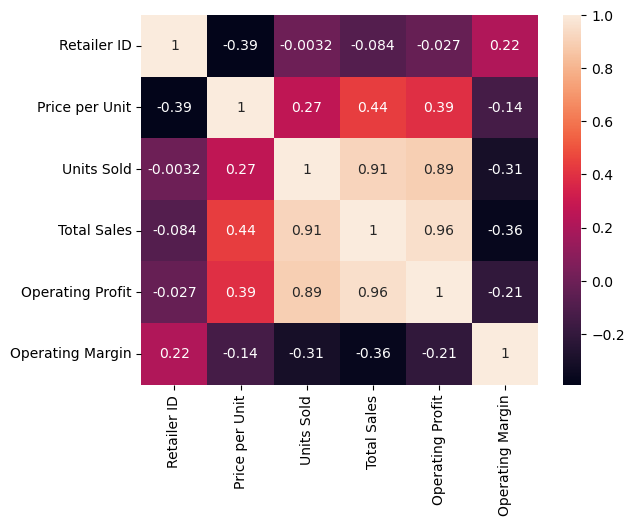

In [16]:
numeric_df=df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

A correlation coefficient of 0.9563 suggests a strong positive correlation between Total Sales and Operating Profit. Additionally, with a correlation coefficient of 0.8924, there's evidence of a positive relationship between Units Sold and Operating Profit.

In simpler terms, when Total Sales increase, Operating Profit tends to increase as well. This positive association indicates that Operating Profit does indeed influence Units Sold in a positive manner, affirming the answer to question 3 as YES.

## 4. Efficiency of Sales Methods: Which sales method is more effective — in-store or online?

In [17]:
df.groupby('Sales Method').agg({'Total Sales':'sum','Units Sold':'sum','Operating Profit':'sum', 'Operating Margin':'sum'})

,Total Sales,Units Sold,Operating Profit,Operating Margin
Sales Method,,,,
In-store,356643750.0,689990,1.275913e+08,619.65
Online,247672882.0,939093,9.655518e+07,2269.24
Outlet,295585493.0,849778,1.079883e+08,1192.13


The table provides a breakdown of sales figures and profitability across different sales channels: in-store, online, and outlet.

Total Sales:
- In-store: `$356,643,750`
- Online: `$247,672,882`
- Outlet: `$295,585,493`

Operating Profit:
- In-store: Approximately `$127,591,300`
- Online: Approximately `$96,555,180`
- Outlet: Approximately `$107,988,300`

Operating Margin (Operating Profit divided by Total Sales):
- In-store: `35.78%`
- Online: `38.99%`
- Outlet: `36.53%`

Key Insights:
- In terms of Total Sales and Operating Profit: In-store sales outperform other channels, yielding the highest total sales and operating profit.
- In terms of Operating Margin: Online sales demonstrate the highest efficiency, with a greater percentage of profit relative to total sales compared to other channels.

Takeaways:
- For maximizing total revenue and profit, in-store sales prove most effective.
- For optimizing profitability per dollar of sales, online sales emerge as the preferred option.

Ultimately, the choice between sales methods hinges on the business's priorities, whether it's maximizing revenue or ensuring high profitability relative to sales generated.

## 5. Price Optimization: Is there a specific price range that achieves better sales than others?


In [18]:
bins=[0,20,40,60,80,100,200]
labels=['0-20','20-40','40-60','60-80', '80-100', '100+']

df['price_range']=pd.cut(df['Price per Unit'], bins=bins, labels=labels)


In [19]:
price_range_sales = df.groupby('price_range')['Total Sales'].sum().reset_index()
top_performing_price_range = price_range_sales.sort_values(by='Total Sales',ascending=False).head()
top_performing_price_range

,price_range,Total Sales
2,40-60,431531309.0
3,60-80,243466864.0
1,20-40,164362210.0
4,80-100,48016105.0
0,0-20,6659931.0


The data presents different price ranges and their corresponding total sales figures:

- Price Range 0-20: Total Sales o`f $6,659,9`31
- Price Range 20-40: Total Sales `of $164,362,`210
- Price Range 40-60: Total Sales` of $431,531`,309
- Price Range 60-80: Total Sale`s of $243,46`6,864
- Price Range 80-100: Total Sal`es of $48,0`16,105

Interpreting the data, it's evident that the price range of 40-60 dollars stands out with the highest total sales, significantly surpassing other price ranges. This suggests that products priced `bet`ween `$40` and $60 are particularly attractive to consumers and likely achieve better sales performance compared to products in other price ranges. On the other hand, the lowest total sales are observed in the price range of 0-20 dollars, indicating that products priced very low may not necessarily generate substantial sales volume. 

In summary, the data implies that there is indeed a specific price range, specifically 40-60 dollars, that tends to achieve better sales than others, highlighting the importance of strategic price optimization in maximizing sales revenue.

## 6. Product Portfolio Optimization: Determine which products are most profitable, segmented by location.

In [20]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'price_range'],
      dtype='object')

In [21]:
product_sales = df.groupby(['City','Product'])['Total Sales'].sum().reset_index()
top_performing_product_sales = product_sales.sort_values(by=['Product', 'City', 'Total Sales'], ascending=[True, True, False]).reset_index(drop=True)
top_performing_product_sales = top_performing_product_sales[['Product', 'City', 'Total Sales']] 
top_performing_product_sales

,Product,City,Total Sales
0,Men's Apparel,Albany,3873553.0
1,Men's Apparel,Albuquerque,2528344.0
2,Men's Apparel,Anchorage,1677524.0
3,Men's Apparel,Atlanta,2436654.0
4,Men's Apparel,Baltimore,808227.0
...,...,...,...
307,Women's Street Footwear,Seattle,4229292.0
308,Women's Street Footwear,Sioux Falls,931671.0
309,Women's Street Footwear,St. Louis,1078374.0
310,Women's Street Footwear,Wichita,1116162.0


The analysis provides valuable insights into both profitability and sales performance across different locations:

Profitability Insights:
- In Albany, 'Women's Apparel' and 'Men's Street Footwear' demonstrate high profitability, boasting profit margins of approximately 49% and 46%, respectively.
- Wilmington exhibits a different pattern, with 'Women's Apparel', 'Women's Athletic Footwear', and 'Women's Street Footwear' leading in profitability, each achieving around 40% profit margins.

Sales Performance Insights:
- New York emerges as a sales leader for 'Men's Apparel', 'Men's Athletic Footwear', and 'Women's Athletic Footwear', suggesting a robust market for these product categories.
- Charleston and San Francisco stand out for their strong sales of 'Men's Street Footwear' and 'Women's Street Footwear', respectively.
- Omaha consistently displays lower sales figures across various products, indicating potentially limited market penetration or demand in that area.

Overall Implications:
- The analysis underscores the importance of tailored marketing and sales strategies tailored to each location's unique consumer preferences and market dynamics.
- Varied trends across cities like Albany, Wilmington, and Omaha highlight the necessity of adopting location-specific approaches to maximize sales and profitability.
- Understanding and adapting to local consumer preferences is crucial for optimizing sales performance and profitability across different geographical markets.

## 7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.

In [22]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,price_range
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,40-60
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,40-60
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,20-40
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,40-60
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,40-60


In [23]:
# Group by 'City' and 'Retailer' and aggregate the columns
store_performance = df.groupby(['City', 'Retailer']).agg({'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()

# Rename the 'Operating Margin' column to 'Profit Margin' for consistency
store_performance['profit_margin']=store_performance['Operating Profit']/store_performance['Total Sales']

# Sort the dataframe by 'City' and then by 'Total Sales' in descending order
store_performance.sort_values(by=['City', 'Total Sales'], ascending=[True, False], inplace=True)

# Reset the index
store_performance.reset_index(drop=True, inplace=True)

# Display the dataframe
store_performance

,City,Retailer,Total Sales,Operating Profit,profit_margin
0,Albany,West Gear,20735165.0,8062399.80,0.388827
1,Albany,Kohl's,3692639.0,1367451.11,0.370318
2,Albuquerque,Kohl's,17065965.0,5783668.15,0.338901
3,Albuquerque,Sports Direct,2799051.0,954392.26,0.340970
4,Anchorage,Amazon,13365025.0,4143804.75,0.310048
...,...,...,...,...,...
103,St. Louis,West Gear,1701133.0,681457.25,0.400590
104,Wichita,Kohl's,6451914.0,2279774.62,0.353349
105,Wichita,Foot Locker,3520950.0,1230372.67,0.349443
106,Wilmington,Foot Locker,8387568.0,3077352.68,0.366895


The aggregated data provides a comprehensive overview of retail store performance across various cities, focusing on key metrics such as Total Sales, Operating Profit, and Profit Margin. Here are the insights gleaned from the analysis:

Top Performers:
- 'West Gear' in Albany leads with approximately $20.7 million in total sales and a profit margin of about 38.9%.
- In Albuquerque, 'Kohl's' stands out with total sales of $17.1 million and a profit margin of approximately 33.9%.

Comparative Store Performances:
- Cities with multiple listed retailers, like Albuquerque and Wichita, exhibit notable differences in sales and profit margins among stores.
- For instance, 'Kohl's' in Albuquerque surpasses 'Sports Direct' not only in total sales but also maintains a slightly lower profit margin.

Profit Margins Analysis:
- Profit margins vary across cities and stores, with 'West Gear' in St. Louis achieving a high margin of 40.1%, while 'Amazon' in Anchorage records a lower margin of 31%.

Sales vs. Profit Margins:
- The relationship between high sales and high profit margins isn't always direct. For example, 'Kohl's' in Wichita boasts higher sales than 'Foot Locker' in the same city, yet their profit margins are relatively similar.

Regional Variations:
- Regional disparities in store performance are evident. Stores under the same brand in different cities, like 'Kohl's' in Albany versus Albuquerque, exhibit varying levels of sales and profit margins, indicating the significant influence of location on retail performance.

Conclusion:
- The analysis underscores the critical role of location in retail sales and profitability.
- The insights derived can inform strategic decisions regarding operations optimization, market expansion, and performance improvement initiatives.

## 8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.

In [24]:
# Assuming your DataFrame is named 'df'
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.set_index('Invoice Date', inplace=True)

In [25]:
monthly_sales = df['Total Sales'].resample('M').sum()

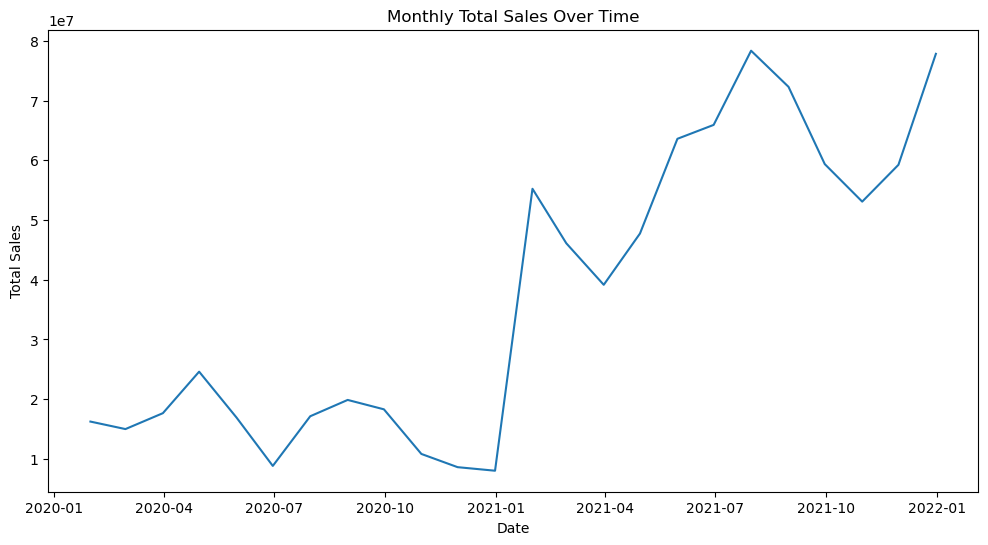

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

The sales data spanning from January 2020 to January 2022 reveals a notable seasonality, characterized by significant variability and distinct peaks and dips. Key insights from the analysis include:

Summary:
- The monthly sales data exhibit pronounced fluctuations, with notable peaks observed around April 2021 and consistent increases noted in December and April of each year.
- These peaks likely correspond to holiday seasons and sales promotions, indicating a seasonal influence on purchasing behavior.
- Despite some fluctuations, there is a general upward trend in sales over the two-year period, suggesting overall growth in demand.

Insights:
- Understanding and acknowledging the seasonal patterns in sales is crucial for businesses to effectively manage inventory, allocate resources, and plan marketing strategies.
- By recognizing the peaks and dips in sales, businesses can anticipate periods of high demand and adjust their operations accordingly to capitalize on opportunities during peak seasons.
- Strategic alignment of marketing efforts with anticipated periods of high demand can help businesses optimize their promotional activities and maximize sales during peak seasons.
- Effective inventory management practices, such as stocking up on popular products prior to peak seasons, can ensure that businesses are well-prepared to meet increased customer demand.
- Overall, leveraging insights into seasonal sales patterns enables businesses to enhance their responsiveness to customer needs, improve customer satisfaction, and drive business growth.

In conclusion, by understanding and leveraging insights into seasonality in sales data, businesses can position themselves for success by effectively adapting their strategies to capitalize on peak seasons and mitigate the impact of seasonal fluctuations on business performance.

## 9. Predictive Sales Analysis: Develop a forecast for monthly sales.

Mean Squared Error: 109170310053386.05


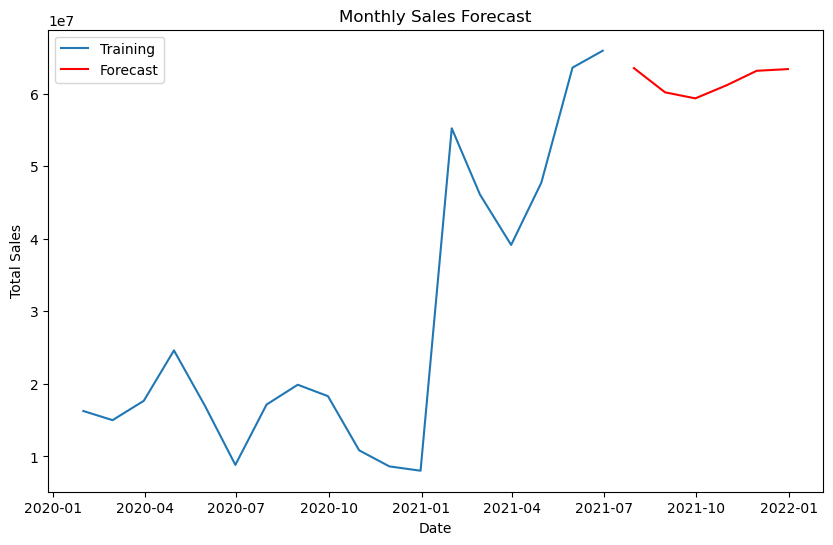

In [27]:

from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets. You can use the first part of the data for training and the rest for testing.
train_data = monthly_sales.iloc[:len(monthly_sales)-6]  # Use first n-12 months for training
test_data = monthly_sales.iloc[len(monthly_sales)-6:]   # Use last 12 months for testing
# train_data = monthly_sales.loc[:'2022-01-01']  # Use data up to January 2022 for training
# test_data = monthly_sales.loc['2022-02-01':]   # Use data from February 2022 onwards for testing


p = 2  # Autoregressive order
d = 1  # Differencing order
q = 2  # Moving average order

# Fit an ARIMA model to the training data.
model = ARIMA(train_data, order=(p, d, q))  # Specify order (p, d, q) based on model evaluation
fitted_model = model.fit()

# Use the trained model to make predictions on the testing data.
forecast = fitted_model.forecast(steps=6)  # Forecast for the next 12 months


# Compare the predicted values with the actual values from the test data to evaluate the model's performance.
# Example evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)

# Visualize the actual sales data along with the forecasted values.
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
